**Run the following two cells before you begin.**

In [22]:
%autosave 10

Autosaving every 10 seconds


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [24]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [27]:
params_dict={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}
params_dict

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [29]:
from sklearn.model_selection import GridSearchCV
gds=GridSearchCV(rf,param_grid=params_dict,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [30]:
gds.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [31]:
gds_res=pd.DataFrame(gds.cv_results_)
gds_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101064,0.010629,0.005770,0.001108,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813388,0.824895,0.819972,0.819418,0.004714,10
1,0.431505,0.006948,0.021277,0.001244,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812122,0.820253,0.813080,0.815152,0.003628,14
2,1.062348,0.307135,0.064761,0.018928,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810997,0.819550,0.811111,0.813886,0.004005,16
3,2.377373,0.510587,0.092754,0.009907,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811419,0.819269,0.813361,0.814683,0.003338,15
4,0.180300,0.021009,0.008123,0.002097,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814794,0.823347,0.819972,0.819371,0.003518,11
5,1.386301,0.159711,0.040560,0.005891,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.816060,0.824191,0.821660,0.820637,0.003398,2
6,1.920559,0.226505,0.073805,0.014202,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815356,0.824332,0.821238,0.820308,0.003723,7
7,4.343006,0.413265,0.148603,0.013029,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815919,0.824613,0.821800,0.820777,0.003622,1
8,0.244547,0.013112,0.008739,0.000861,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.812544,0.821941,0.817018,0.817168,0.003838,13
9,1.304677,0.122079,0.063486,0.024653,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.814231,0.824051,0.820534,0.819605,0.004062,9


**Find the best hyperparameters from the cross-validation.**

In [32]:
gds.best_params_

{'max_depth': 6, 'n_estimators': 200}

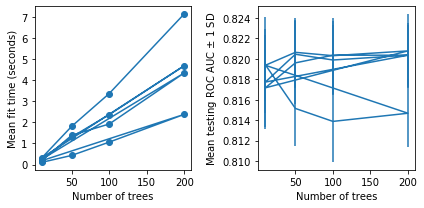

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(gds_res['param_n_estimators'],
            gds_res['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(gds_res['param_n_estimators'],
                gds_res['mean_test_score'],
                yerr=gds_res['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [34]:
# Create a 5x5 grid
a, b = np.meshgrid(range(5), range(5))
print(a)
print(b)
print(a.shape)
print(b.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [35]:
gds_res_mean_ts_rs=gds_res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.81941775, 0.81515166, 0.81388589, 0.81468286],
       [0.81937087, 0.82063663, 0.82030847, 0.82077727],
       [0.8171675 , 0.81960527, 0.82035535, 0.82035535],
       [0.81773006, 0.82044911, 0.81988655, 0.82035535]])

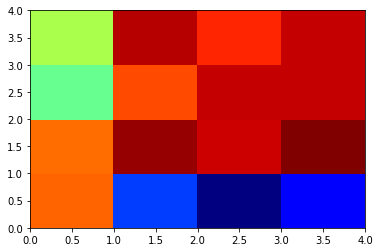

In [37]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(a,b,gds_res_mean_ts_rs,cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

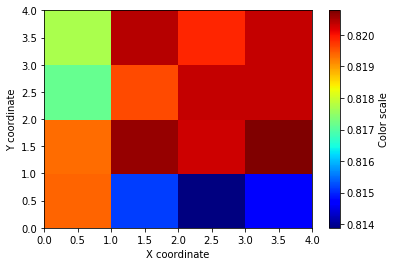

In [38]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(a,b,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [39]:
# Create a dataframe of the feature names and importance
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.060447
1,EDUCATION,0.003172
2,MARRIAGE,0.001623
3,AGE,0.010093
4,PAY_1,0.590012
5,BILL_AMT1,0.024300
6,BILL_AMT2,0.027631
7,BILL_AMT3,0.021155
8,BILL_AMT4,0.020100
9,BILL_AMT5,0.018605


In [40]:
# Sort values by importance
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.590012
11,PAY_AMT1,0.063627
0,LIMIT_BAL,0.060447
12,PAY_AMT2,0.042461
13,PAY_AMT3,0.034814
6,BILL_AMT2,0.027631
14,PAY_AMT4,0.025028
5,BILL_AMT1,0.024300
7,BILL_AMT3,0.021155
15,PAY_AMT5,0.020506
